# Mini-Project: Data Wrangling and Transformation with Pandas

Working with tabular data is a necessity for anyone with enterprises having a majority of their data in relational databases and flat files. This mini-project is adopted from the excellent tutorial on pandas by Brandon Rhodes which you have watched earlier in the Data Wrangling Unit. In this mini-project, we will be looking at some interesting data based on movie data from the IMDB.

This assignment should help you reinforce the concepts you learnt in the curriculum for Data Wrangling and sharpen your skills in using Pandas. Good Luck!

### Please make sure you have one of the more recent versions of Pandas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
pd.__version__

'1.3.4'

## Taking a look at the Movies dataset
This data shows the movies based on their title and the year of release

In [ ]:
movies = pd.read_csv('titles.csv')
movies.info()

In [ ]:
movies.head()

## Taking a look at the Cast dataset

This data shows the cast (actors, actresses, supporting roles) for each movie

- The attribute `n` basically tells the importance of the cast role, lower the number, more important the role.
- Supporting cast usually don't have any value for `n`

In [4]:
cast = pd.read_csv('cast.csv.zip')
cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3786176 entries, 0 to 3786175
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   year       int64  
 2   name       object 
 3   type       object 
 4   character  object 
 5   n          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 173.3+ MB


In [5]:
cast.head(100)

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
...,...,...,...,...,...,...
95,Who's the Man?,1993,Todd 1,actor,Shorty,10.0
96,Love Hollywood Style,2006,Mac 10,actor,Himself,NaN
97,King of the Ville,2011,10Gzy,actor,Crazy,NaN
98,Big Apple,2002,Angel 11:11,actor,Angel,2.0


## Taking a look at the Release dataset

This data shows details of when each movie was release in each country with the release date

In [6]:
release_dates = pd.read_csv('https://raw.githubusercontent.com/springboard-curriculum/mec-mini-projects/master/mec-5.3.10-data-wranging-with-pandas-mini-project/release_dates.csv', parse_dates=['date'], infer_datetime_format=True)
release_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479488 entries, 0 to 479487
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   title    479488 non-null  object        
 1   year     479488 non-null  int64         
 2   country  479488 non-null  object        
 3   date     479488 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 14.6+ MB


In [7]:
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


# Section I - Basic Querying, Filtering and Transformations

### What is the total number of movies?

In [ ]:
len(movies)

### List all Batman movies ever made

In [ ]:
batman_df = movies[movies.title == 'Batman']
print('Total Batman Movies:', len(batman_df))
batman_df

### List all Batman movies ever made - the right approach

In [ ]:
batman_df = movies[movies.title.str.contains('Batman', case=False)]
print('Total Batman Movies:', len(batman_df))
batman_df.head(10)

### Display the top 15 Batman movies in the order they were released

In [ ]:
batman_df.sort_values(by=['year'], ascending=True).iloc[:15]

### Section I - Q1 : List all the 'Harry Potter' movies from the most recent to the earliest

In [ ]:
harry_potter_df = movies[movies.title.str.contains('Harry Potter', case=False)]
harry_potter_df.sort_values(by=['year'],ascending=False)

### How many movies were made in the year 2017?

In [ ]:
len(movies[movies.year == 2017])

### Section I - Q2 : How many movies were made in the year 2015?

In [ ]:
len(movies[movies.year == 2015])

### Section I - Q3 : How many movies were made from 2000 till 2018?
- You can chain multiple conditions using OR (`|`) as well as AND (`&`) depending on the condition

In [ ]:
len(movies[(movies.year >= 2000) & (movies.year <= 2018)])

### Section I - Q4: How many movies are titled "Hamlet"?

In [ ]:
len(movies[movies.title == "Hamlet"])

### Section I - Q5: List all movies titled "Hamlet" 
- The movies should only have been released on or after the year 2000
- Display the movies based on the year they were released (earliest to most recent)

In [ ]:
hamlet_df = movies[movies['year'] >= 2000]
hamlet_sort_df = hamlet_df[hamlet_df.title.str.contains('Hamlet', case=False)]
hamlet_sort_df.sort_values(by=['year'],  ascending=False)

### Section I - Q6: How many roles in the movie "Inception" are of the supporting cast (extra credits)
- supporting cast are NOT ranked by an "n" value (NaN)
- check for how to filter based on nulls

In [ ]:
inception_df = cast[cast.title.str.contains('Inception', case=False)]
inception_isnull_df = inception_df[pd.isnull(inception_df['n'])]
inception_isnull_df

### Section I - Q7: How many roles in the movie "Inception" are of the main cast
- main cast always have an 'n' value

In [ ]:
inception_main_cast_df = cast[cast.title.str.contains('Inception', case=False)]
inception_notnull_df = inception_main_cast_df[pd.notnull(inception_main_cast_df['n'])]
inception_notnull_df

### Section I - Q8: Show the top ten cast (actors\actresses) in the movie "Inception" 
- main cast always have an 'n' value
- remember to sort!

In [ ]:
inception_notnull_df.sort_values(by='n').head(10)

### Section I - Q9:

(A) List all movies where there was a character 'Albus Dumbledore' 

(B) Now modify the above to show only the actors who played the character 'Albus Dumbledore'
- For Part (B) remember the same actor might play the same role in multiple movies

In [ ]:
albus_dumbledore_df = cast[cast['character']=='Albus Dumbledore']
print(albus_dumbledore_df)
print("------------------------------------------------------------------------------------------")
print(albus_dumbledore_df['title'])

In [ ]:
actor_df = albus_dumbledore_df.drop_duplicates(subset='name')
actor_df['name']


### Section I - Q10:

(A) How many roles has 'Keanu Reeves' played throughout his career?

(B) List the leading roles that 'Keanu Reeves' played on or after 1999 in order by year.

In [ ]:
keanu_reeves_char_df = cast[cast['name']=='Keanu Reeves'].drop_duplicates(subset='character')
print(keanu_reeves_char_df)
print("\n\n************************************************************************************")
char = len(keanu_reeves_char_df['character'])
print("Keanu Reeves played - {char} character".format(char=char))
print("************************************************************************************")

In [ ]:
keanu_reeves_not_null_df = keanu_reeves_char_df[pd.notnull(keanu_reeves_char_df['n'])]
keanu_reeves_roles_df = keanu_reeves_not_null_df[keanu_reeves_not_null_df['year'] >= 1999].sort_values(by='year')
keanu_reeves_roles_df

### Section I - Q11: 

(A) List the total number of actor and actress roles available from 1950 - 1960

(B) List the total number of actor and actress roles available from 2007 - 2017

In [ ]:
total_roles1_df = cast[(cast['year'] >= 1950) & (cast['year'] <= 1960)].drop_duplicates(subset='character')
#total_roles1_sort_df = total_roles1_df.sort_values(by='year')
len(total_roles1_df['character'])

In [ ]:
total_roles2_df = cast[(cast['year'] >= 2007) & (cast['year'] <= 2017)].drop_duplicates(subset='character')
#total_roles2_sort_df = total_roles2_df.sort_values(by='year')
#total_roles2_sort_df.tail()
len(total_roles2_df['character'])

### Section I - Q12: 

(A) List the total number of leading roles available from 2000 to present

(B) List the total number of non-leading roles available from 2000 - present (exclude support cast)

(C) List the total number of support\extra-credit roles available from 2000 - present

In [60]:
total_roles3_df = cast[(cast['year'] >= 2000) & (cast['n'] == 1.0)]
total_roles3_df = total_roles3_df.drop_duplicates(subset='character')
total_roles3_df['character'].value_counts().sum()

38919

In [61]:
total_roles4_df = cast[(cast['year'] >= 2000) & (cast['n'] > 1.0)]
total_roles4_df = total_roles4_df.drop_duplicates(subset='character')
total_roles4_df['character'].value_counts().sum()

473347

In [62]:
total_roles5_df = cast[(cast['year'] >= 2000)]
total_roles5_df = total_roles5_df.drop_duplicates(subset='character')
total_supporting_roles_df = pd.isnull(total_roles5_df['character'])
total_supporting_roles_df.value_counts().sum()

817502

# Section II - Aggregations, Transformations and Visualizations

## What are the top ten most common movie names of all time?


In [ ]:
top_ten = movies.title.value_counts()[:10]
top_ten

### Plot the top ten common movie names of all time

In [ ]:
top_ten.plot(kind='barh')

### Section II - Q1:  Which years in the 2000s saw the most movies released? (Show top 3)

In [ ]:
released_movies_df = release_dates[release_dates['year'] >= 2000]
released_movies_sort_df = released_movies_df['year'].value_counts()[:3]
print(released_movies_sort_df)
released_movies_sort_df.plot(kind='bar')


### Section II - Q2: # Plot the total number of films released per-decade (1890, 1900, 1910,....)
- Hint: Dividing the year and multiplying with a number might give you the decade the year falls into!
- You might need to sort before plotting

In [259]:
release_dates = pd.read_csv('https://raw.githubusercontent.com/springboard-curriculum/mec-mini-projects/master/mec-5.3.10-data-wranging-with-pandas-mini-project/release_dates.csv', parse_dates=['date'], infer_datetime_format=True)
release_dates.info()
release_dates.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479488 entries, 0 to 479487
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   title    479488 non-null  object        
 1   year     479488 non-null  int64         
 2   country  479488 non-null  object        
 3   date     479488 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 14.6+ MB


,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


In [ ]:
decade = []
df_decade = release_dates


for key, val in df_decade['year'].iteritems():
    ceiling_decade = 0
    ceiling_decade = (val - (val % 10)) + 10
    decade.append(ceiling_decade)
    
df_decade['release_decade_year'] = decade


df_decade['release_decade_year'].value_counts().sort_values().plot(kind='bar')
plt.ylabel("Number of Movies released in the decade")
plt.xlabel("Decade")



### Section II - Q3: 

(A) What are the top 10 most common character names in movie history?

(B) Who are the top 10 people most often credited as "Herself" in movie history?

(C) Who are the top 10 people most often credited as "Himself" in movie history?

In [ ]:
history_df = release_dates
history_top10_df = cast['character'].value_counts()
history_top10_df.head(10)

In [ ]:
actress_top10_roles_freq = cast[cast['character'] == 'Herself']
actress_top10_roles_freq['name'].value_counts()[:10]

In [ ]:
actors_top10_roles_freq = cast[cast['character'] == 'Himself']
actors_top10_roles_freq['name'].value_counts()[:10]

### Section II - Q4: 

(A) What are the top 10 most frequent roles that start with the word "Zombie"?

(B) What are the top 10 most frequent roles that start with the word "Police"?

- Hint: The `startswith()` function might be useful

In [ ]:
zombie_role = []
for idx in cast.index:
    if cast['title'][idx].startswith('Zombie'):
        #print ((cast['title'][idx], cast['character'][idx]))
        zombie_role.append(cast['character'][idx])
        #zombie_df[idx] = release_dates[idx]

zombie_role_series = pd.Series(zombie_role)
print("The top 10 most frequent roles that start with Zombie are \n\n",zombie_role_series.value_counts()[:10])
#zombie_df['character'].value_counts()[:10]

In [ ]:
police_role = []

for ind in cast.index:
    if cast['title'][ind].startswith('Police'):
        police_role.append(cast['character'][idx])

police_role_series = pd.Series(police_role)
print("The top 10 most frequent roles that start with Police are \n\n",police_role_series.value_counts()[:10])

### Section II - Q5: Plot how many roles 'Keanu Reeves' has played in each year of his career.

In [ ]:
keanu_reeves_role_df = cast[cast['name'] == 'Keanu Reeves']
keanu_reeves_role_sort_df['year'].value_counts().sort_values().plot(kind='bar')

### Section II - Q6: Plot the cast positions (n-values) of Keanu Reeve's roles through his career over the years.


In [ ]:
keanu_reeves_not_null_df = keanu_reeves_char_df[pd.notnull(keanu_reeves_char_df['n'])]
keanu_reeves_not_null_df['n'].sort_values().value_counts().plot(kind='bar')

### Section II - Q7: Plot the number of "Hamlet" films made by each decade

In [ ]:
hamlet = []
df_hamlet = release_dates[release_dates['title'] == 'Hamlet']


for key, val in df_hamlet['year'].iteritems():
    ceiling_decade = 0
    ceiling_decade = (val - (val % 10)) + 10
    hamlet.append(ceiling_decade)
    
df_hamlet['release_decade_year'] = hamlet

#print((df_hamlet['title'],df_hamlet['year']))

df_hamlet['release_decade_year'].value_counts().sort_values().plot(kind='bar')
plt.ylabel("Number of Hamlet Movies released in the decade")
plt.xlabel("Decade")


### Section II - Q8: 

(A) How many leading roles were available to both actors and actresses, in the 1960s (1960-1969)?

(B) How many leading roles were available to both actors and actresses, in the 2000s (2000-2009)?

- Hint: A specific value of n might indicate a leading role

In [58]:
leading_roles_df = cast[(cast['year'] >= 1960) & (cast['year'] <= 1969) & (cast['n'] == 1.0)]
leading_roles_unique_df = leading_roles_df.drop_duplicates(subset='character')
leading_roles_unique_df['character'].value_counts().sum()

9908

In [59]:
leading_roles_df1 = cast[(cast['year'] >= 2000) & (cast['year'] <= 2009) & (cast['n'] == 1.0)]
leading_roles_unique_df1 = leading_roles_df1.drop_duplicates(subset='character')
leading_roles_unique_df1['character'].value_counts().sum()

19154

### Section II - Q9: List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [ ]:
frank_role_df = cast[cast['name'] == 'Frank Oz'].drop_duplicates(subset='character')


frank_role_count_df = frank_role_df[frank_role_df['title'].duplicated(keep=False)]

#frank_role_count_df
#print(frank_role_df.sort_values(by='year'))
frank_role_count_df = frank_role_count_df.rename_axis('Myidx')
frank_role_sort_df = frank_role_count_df.sort_values(by=['year','Myidx'])
frank_role_sort_df

### Section II - Q10: List each of the characters that Frank Oz has portrayed at least twice

In [ ]:
frank_role_freq_df = cast[cast['name'] == 'Frank Oz']
frank_role_freq_df = frank_role_freq_df[frank_role_freq_df['character'].duplicated(keep=False)]
frank_role_freq_df['character'].value_counts()

# Section III - Advanced Merging, Querying and Visualizations

## Make a bar plot with the following conditions
- Frequency of the number of movies with "Christmas" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

In [ ]:
christmas = release_dates[(release_dates.title.str.contains('Christmas')) & (release_dates.country == 'USA')]
christmas.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q1: Make a bar plot with the following conditions
- Frequency of the number of movies with "Summer" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

In [ ]:
summer = release_dates[(release_dates.title.str.contains('Summer')) & (release_dates.country == 'USA')]
summer.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q2: Make a bar plot with the following conditions
- Frequency of the number of movies with "Action" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by week

In [ ]:
action = release_dates[(release_dates.title.str.contains('Action')) & (release_dates.country == 'USA')]
#print(action)
action.date.dt.week.value_counts().sort_index().plot(kind='bar')

### Section III - Q3: Show all the movies in which Keanu Reeves has played the lead role along with their   release date in the USA sorted by the date of release
- Hint: You might need to join or merge two datasets!

In [8]:
release_dates = pd.read_csv('https://raw.githubusercontent.com/springboard-curriculum/mec-mini-projects/master/mec-5.3.10-data-wranging-with-pandas-mini-project/release_dates.csv', parse_dates=['date'], infer_datetime_format=True)
release_dates.info()
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


In [9]:
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [20]:
cast_rel_df = cast.merge(release_dates, on=['title','year'], how='left')
cast_rel_df.head()

,title,year,name,type,character,n,country,date
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0,Taiwan,2016-05-27
1,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0,Germany,2016-10-06
2,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0,France,2017-12-13
3,Suuri illusioni,1985,Homo $,actor,Guests,22.0,Finland,1985-11-01
4,Suuri illusioni,1985,Homo $,actor,Guests,22.0,Denmark,1987-09-21


In [53]:
#keanu_reeves_movie_release_usa_df = cast_rel_df[(cast_rel_df['name'] == 'Keanu Reeves') & (cast_rel_df['country'] == 'USA')]
keanu_reeves_movie_release_usa_df = cast_rel_df[(cast_rel_df['name'] == 'Keanu Reeves') & (cast_rel_df['country'] == 'USA') & (cast_rel_df['n'] >= 1.0) & (cast_rel_df['n'] <= 6.0)]
keanu_reeves_movie_release_usa_df = keanu_reeves_movie_release_usa_df[pd.notnull(keanu_reeves_movie_release_usa_df['n'])].sort_values(by='date')
keanu_reeves_movie_release_usa_df

,title,year,name,type,character,n,country,date
10726175,River's Edge,1986,Keanu Reeves,actor,Matt,2.0,USA,1987-05-08
10726692,The Night Before,1988,Keanu Reeves,actor,Winston Connelly,1.0,USA,1988-04-15
10726152,Permanent Record,1988,Keanu Reeves,actor,Chris Townsend,6.0,USA,1988-04-22
10725633,Bill & Ted's Excellent Adventure,1989,Keanu Reeves,actor,Ted,1.0,USA,1989-02-17
10725745,Dangerous Liaisons,1988,Keanu Reeves,actor,Chevalier Danceny,5.0,USA,1989-02-24
10725868,I Love You to Death,1990,Keanu Reeves,actor,Marlon,6.0,USA,1990-04-06
10726800,Tune in Tomorrow...,1990,Keanu Reeves,actor,Martin Loader,2.0,USA,1990-11-02
10726153,Point Break,1991,Keanu Reeves,actor,Johnny Utah,2.0,USA,1991-07-12
10725624,Bill & Ted's Bogus Journey,1991,Keanu Reeves,actor,Ted,1.0,USA,1991-07-19
10725765,Dracula,1992,Keanu Reeves,actor,Jonathan Harker,4.0,USA,1992-11-13


### Section III - Q4: Make a bar plot showing the months in which movies with Keanu Reeves tend to be released in the USA?

<AxesSubplot:xlabel='Month', ylabel='Number of movies released'>

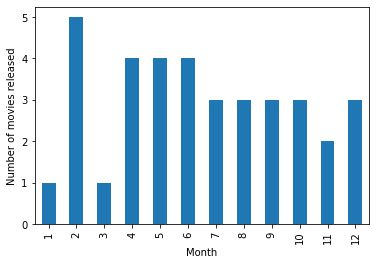

In [54]:
keanu_reeves_movie_release_usa_df['date'].dt.month.value_counts().sort_index().plot(kind='bar', xlabel='Month', ylabel='Number of movies released')

### Section III - Q5: Make a bar plot showing the years in which movies with Ian McKellen tend to be released in the USA?

<AxesSubplot:xlabel='Year', ylabel='Number of movies released'>

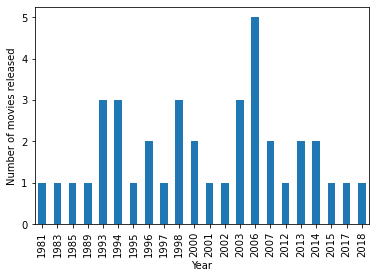

In [43]:
ian_movie_release_usa_df = cast_rel_df[(cast_rel_df['name'] == 'Ian McKellen') & (cast_rel_df['country'] == 'USA')]
ian_movie_release_usa_df = ian_movie_release_usa_df.sort_values(by='date')
ian_movie_release_usa_df['date'].dt.year.value_counts().sort_index().plot(kind='bar', xlabel='Year', ylabel='Number of movies released')